In [43]:
import math 
import copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("./deeplearning.mplstyle")
np.set_printoptions(precision=2)

In [44]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [45]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

In [46]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        dj_dw_i=(f_wb_i-y[i])*x[i]
        dj_db_i=(f_wb_i-y[i])
        dj_db=dj_db+dj_db_i
        dj_dw=dj_dw+dj_dw_i
    dj_dw=dj_dw/(m)
    dj_db=dj_db/(m)
    return dj_dw,dj_db

In [59]:
def gradient_desent(x,y,w_in,b_in,numb_itter,alpha,cost_function,gradient_function):
    w=copy.deepcopy(w_in)
    b=b_in

    J_hist=[]

    for i in range(numb_itter):
        dj_dw,dj_db=gradient_function(x,y,w,b)

        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)

        if i<10000:
            J_hist.append(cost_function(x,y,w,b))

        if i % math.ceil(numb_itter/10)==0:
            print(f"itter: {i:4d}  w: {w}  b: {b} j_hist: {J_hist[-1]:8.2f}")
    return w,b,J_hist

In [65]:
#finding w and b
initial_w = np.zeros_like(w_init)
initial_b = 0.
numb_itter=1000
alpha=5.0e-7
w_f,b_f,J_hist=gradient_desent(X_train,y_train,initial_w,initial_b,numb_itter,alpha,compute_cost,compute_gradient)
print(f"w and b by gradient desent w: {w_f},  b: {b_f:0.2f}")

itter:    0  w: [2.41e-01 5.59e-04 1.84e-04 6.03e-03]  b: 0.000145 j_hist:  2529.46
itter:  100  w: [ 0.2  0.  -0.  -0. ]  b: -0.0001198596187768893 j_hist:   695.99
itter:  200  w: [ 0.2   0.   -0.   -0.01]  b: -0.00035965781839536286 j_hist:   694.92
itter:  300  w: [ 0.2   0.   -0.   -0.02]  b: -0.0005983240279392168 j_hist:   693.86
itter:  400  w: [ 0.2   0.   -0.   -0.02]  b: -0.0008358632706869382 j_hist:   692.81
itter:  500  w: [ 0.2   0.   -0.01 -0.03]  b: -0.0010722805476294612 j_hist:   691.77
itter:  600  w: [ 0.2   0.   -0.01 -0.04]  b: -0.0013075808375690545 j_hist:   690.73
itter:  700  w: [ 0.2   0.   -0.01 -0.04]  b: -0.0015417690972177696 j_hist:   689.71
itter:  800  w: [ 0.2   0.   -0.01 -0.05]  b: -0.001774850261295446 j_hist:   688.70
itter:  900  w: [ 0.2   0.   -0.01 -0.06]  b: -0.0020068292426272975 j_hist:   687.69
w and b by gradient desent w: [ 0.2   0.   -0.01 -0.07],  b: -0.00


In [63]:
# let try it on our original data

m=X_train.shape[0]
for i in range(m):
    print(f"predicted: {np.dot(X_train[i],w_f)+b_f}  actual value: {y_train[i]}")



predicted: 426.18530497189204  actual value: 460
predicted: 286.1674720078562  actual value: 232
predicted: 171.46763087132317  actual value: 178


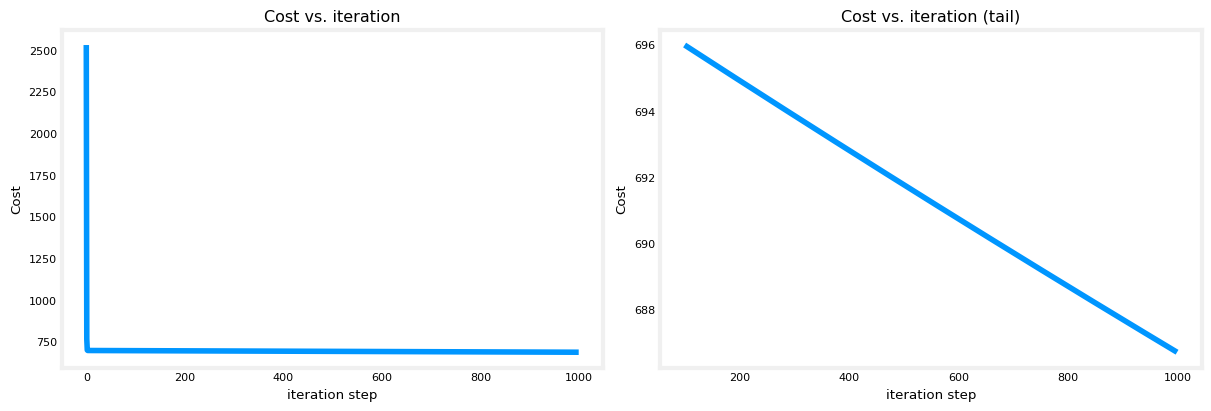

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

not good prediction the cost is declining